In [12]:
import numpy as np
from numpy import cos, sin
from itertools import product

import matplotlib
matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [20]:
numpoints = 10
domain = np.linspace(0, 2 * np.pi, numpoints)
# iden, X, Y, Z = np.identity(2), msigma(1), msigma(2), msigma(3)
iden = np.identity(2)
X = np.matrix('0 1; 1 0')
Y = np.matrix('0 -1j; 1j 0')
Z = np.matrix('1 0; 0 -1')

In [4]:
X

matrix([[0, 1],
        [1, 0]])

In [21]:
allowed = []
for theta1, theta2, theta3, alpha, beta in product(domain, repeat=5):
    lhs = (cos(theta1) * iden + 1j * sin(theta1) * Z) * (cos(alpha) * iden + 1j * sin(alpha) * Y) * (cos(theta2) * iden + 1j * sin(theta2) * Z) * (cos(alpha) * iden + 1j * sin(alpha) * Y) * (cos(theta3) * iden + 1j * sin(theta3) * Z)
    rhs = (cos(beta) * iden + 1j * sin(beta) * Y)
    diff = np.allclose(lhs, rhs)
    if diff:
        allowed.append((alpha, beta))

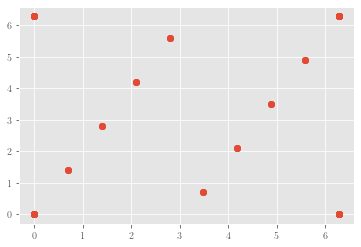

In [22]:
plt.scatter(*zip(*allowed))

In [54]:
import sympy as sym
from sympy import Symbol, I, cos, sin, eye
from sympy.matrices import rot_axis1, rot_axis2, rot_axis3, Matrix
from sympy.abc import alpha, beta, theta, phi, psi
from itertools import product

from sympy.physics.paulialgebra import Pauli, evaluate_pauli_product
from sympy.physics.matrices import msigma

import numpy as np

In [55]:
lhs = (cos(theta) * eye(2) + I * sin(theta) * msigma(3)) * (cos(alpha) * eye(2) + I * sin(alpha) * msigma(2)) * (cos(phi) * eye(2) + I * sin(phi) * msigma(3)) * (cos(alpha) * eye(2) + I * sin(alpha) * msigma(2)) * (cos(psi) * eye(2) + I * sin(psi) * msigma(3))
rhs = cos(beta) * eye(2) + I * sin(beta) * msigma(2)

In [56]:
lhs

Matrix([
[                  (I*sin(psi) + cos(psi))*(-(-I*sin(phi) + cos(phi))*(I*sin(theta) + cos(theta))*sin(alpha)**2 + (I*sin(phi) + cos(phi))*(I*sin(theta) + cos(theta))*cos(alpha)**2), (-I*sin(psi) + cos(psi))*((-I*sin(phi) + cos(phi))*(I*sin(theta) + cos(theta))*sin(alpha)*cos(alpha) + (I*sin(phi) + cos(phi))*(I*sin(theta) + cos(theta))*sin(alpha)*cos(alpha))],
[(I*sin(psi) + cos(psi))*(-(-I*sin(phi) + cos(phi))*(-I*sin(theta) + cos(theta))*sin(alpha)*cos(alpha) - (I*sin(phi) + cos(phi))*(-I*sin(theta) + cos(theta))*sin(alpha)*cos(alpha)),               (-I*sin(psi) + cos(psi))*((-I*sin(phi) + cos(phi))*(-I*sin(theta) + cos(theta))*cos(alpha)**2 - (I*sin(phi) + cos(phi))*(-I*sin(theta) + cos(theta))*sin(alpha)**2)]])

In [57]:
sym.simplify(lhs.expand())

Matrix([
[2*sin(alpha)**2*sin(psi)*sin(theta)*cos(phi) - 2*I*sin(alpha)**2*sin(psi)*cos(phi)*cos(theta) - 2*I*sin(alpha)**2*sin(theta)*cos(phi)*cos(psi) - 2*sin(alpha)**2*cos(phi)*cos(psi)*cos(theta) - I*sin(phi)*sin(psi)*sin(theta) - sin(phi)*sin(psi)*cos(theta) - sin(phi)*sin(theta)*cos(psi) + I*sin(phi)*cos(psi)*cos(theta) - sin(psi)*sin(theta)*cos(phi) + I*sin(psi)*cos(phi)*cos(theta) + I*sin(theta)*cos(phi)*cos(psi) + cos(phi)*cos(psi)*cos(theta),                                                                                                                                                                                                                                                                                                                                                                                                        2*exp(I*(-psi + theta))*sin(alpha)*cos(alpha)*cos(phi)],
[                                                                                              

In [36]:
# tlhs = 
sym.nsolve(lhs, rhs, 0)

TypeError: X must be a row or a column matrix